# Runtime Comparison For C++ and Python Code


## Method

Measuring average execution time $t(N)$  for **fun_algo (C++)** and **STBSOL_finder (python)** for varying preference table size in $H$ and $F$. Average execution time calculated from the $\text{execution time}/M$ for a function after $M$ iterations. These execution times were then averaged over 4 different randomly generated preference tables $A$ and $B$ for $\forall n \in N$:

| N (Length of A & B) | M (Repeated Simulations) | # pref tables 
| --- | --- | ---|
| [4,6,8,9] | $10^5$| 4 |


-  Execution times for **C++** were recorded in C++ using code found in the **Task 3 -> C++** folder.
-  **python** times were recorded from code in this notebook

Both of these tests were conducted in Windows, and not in Unix on the Virtual Machine

****************

## Preference Table Generator and Writer

Preference tables were randomly generated from random.seed(12345), they were saved as .csv files which were read by the **C++** code. These .csv files can be found in the **Task 3 -> C++**.

In [29]:
##Random Preference Table Generator and Writer

import random

def pref_gen(A,B):
    
    N = len(A)
    
    if len(A) != len(B): #Raises error if input lists are of varying lengths
        
        raise ValueError("Input lists A and B are not of identical length") 
    
    
    #Generates the an individual's preference for those in the other list
    #for both of the input lists.
    
    A_prefs = {i:random.sample(B,N) for i in A}
    
    B_prefs = {i:random.sample(A,N) for i in B}
    
    return A_prefs,B_prefs

##Writes Randomly generated Pref tables to .csv files
def write_values_to_csv(dictionary, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for value in dictionary.values():
            writer.writerow(value)
                

In [68]:
##Writes csv files for C++ code to read
for i in [4,6,8,9]:
    random.seed(1234)
    for j in range(0,4):
        sets = [x for x in range(1,i+1)]
        
        nme = str(i) + '_' + str(j) + '.csv'
        
        A_prefs,B_prefs = pref_gen(sets,sets)
        
        write_values_to_csv(A_prefs, 'Aout_' + nme)
        write_values_to_csv(B_prefs, 'Bout_' + nme)

## Python Functions: IS_STABLE and STBSOL_finder

In [91]:
### Pyhton Functions

from itertools import zip_longest #Used for zip_longest

##IS_STABLE and STBSOL_finder (fundamental algorithm) from previous assignment
def IS_STABLE(mtch: list, H_pref : dict, F_pref : dict, rout = False):
    
    WF = set()
    WH = set() #Stores 'Winners': those matched with their 1st pref

    N_H = list(H_pref.keys())
    N_F = list(F_pref.keys())
    
    F_temp = F_pref.copy()
    H_temp = H_pref.copy()


    stb = 1 #Stability Indicator, Output of IS_STABLE. 1 is yes 0 is no


    ##Identifying Winners and Losers

    for k_1,k_2 in mtch:

        pH = H_temp[k_1][0] 
        pF = F_temp[k_2][0]  
        
        
        if pH is k_2:
            H_temp.pop(k_1)
            WH.add(k_1) #If H gets 1st pref, add to WH set.


        else: #'Losers' have preference table trimmed
            
            H_temp[k_1] = H_temp[k_1][:H_temp[k_1].index(k_2)] 


        if pF is k_1:
            F_temp.pop(k_2)
            WF.add(k_2)
        else:
            F_temp[k_2] = F_temp[k_2][:F_temp[k_2].index(k_1)] #Unsatisfied Hs and Fs will have both those
                                                               #they prefer less than their curernt partner
                                                               #and their current partner removed from their preferences.



    key_Hs = set(N_H) - WH
    key_Fs = set(N_F) - WF #Removes 'content' individuals from being iterated over. 
                         #They won't take part in the next bit.


    ### Affair Process

    ##Removes the 'Winners' from the 'Loser's preference tables

    for k_F, k_H in zip_longest(key_Fs,key_Hs):

        if k_F is not None:


            F_temp[k_F]= list(set(F_temp[k_F]) - WH)

            if not F_temp[k_F]:
                F_temp.pop(k_F)

        if k_H is not None:

            H_temp[k_H]= list(set(H_temp[k_H]) - WF)

            if not H_temp[k_H]:
                H_temp.pop(k_H)


    ##Identifies potential affairs from those remaining
    for s_H, p_H in H_temp.items():

        for s_F,p_F in F_temp.items():

            if s_F in p_H and s_H in p_F: #Unstable if suitor F and suitor H are mutually amores 

                stb = 0
    
    if rout is True:
    
        if stb == 1:
            print('Current Matching is Stable')

        elif stb == 0:
            print('Current Matching is Un-Stable')    
    
    return stb

def STBSOL_finder(H_prefs, F_prefs, test = False):
    
  
    
    H = H_prefs.copy()
    F = F_prefs.copy() #Copies pref tables for solution process
   
    F_keys = list(F.keys())
    H_keys = list(H.keys())
    
    k = 0
    n = len(H_prefs)
    
    
    ###Initialises Matches and 'Undesirable Man' based on pref table format
    if type(F_keys[0]) == str:
        
        omga = 'Z'
        mtch = {i : omga for i in F_keys}
        
    elif type(F_keys[0]) == int:
        
        omga = n + 1 #Undesirable Male
        mtch = {i : omga for i in range(1,omga)}
   

    
    ###Algorithm 2 as seen in description
    while k < n:

        X = H_keys[k] 

        while X is not omga:

            x = H[X][0]

            x_p = F[x] 

            if X in x_p:

                X_hld = mtch[x]
                mtch[x] = X
                F[x] = F[x][:F[x].index(X)]

                X = X_hld



            if X is not omga:

                H[X].remove(x) #Suitors previous partner is removed from their preference list


        k = k + 1
        
    sol = sorted([(j,i) for i,j in mtch.items()])
    
    if test is True:
            
        IS_STABLE(sol,H_prefs,F_prefs,True)
            
    return sol



## Python Runtime Simulation

In [86]:
import numpy as np
import time 

##Modified timer function from previous assignment
def timer(repeats):
    def decorator(func):
        def wrapper(*args, **kwargs):
            
            start_time = time.perf_counter()
            for i in range(repeats):


                func(*args, **kwargs)
            
            
            end_time = time.perf_counter()
            elapsed_time = (end_time - start_time)/repeats
            
            return elapsed_time
        return wrapper
    return decorator

In [76]:
##Recording Python runtimes
M = 10**5
avg_ts_py = []

for i in [4,6,8,9]:
    random.seed(1234)
    t_total = 0
    for j in range(0,4):
        sets = [x for x in range(1,i+1)]
        
        A_prefs,B_prefs = pref_gen(sets,sets) #Python implementation uses the exact same preference tables as C++
        t_total = timer(10**5)(STBSOL_finder)(A_prefs,B_prefs)*10**6 + t_total
        
    avg_ts_py.append(t_total/4)
        
       

## Results

In [89]:
##Recorded Measurments from C++

avg_ts_cpp = [7.08138,12.0007,16.1398,17.6445]
avg_ts_cpp_o3 = [1.64628,3.92854,5.2701,5.89131]

###Recorded Measuremnts from Python

avg_ts_py = [4.598401499997635, 6.07047899999543, 7.5735697499976595, 8.220098250003502]

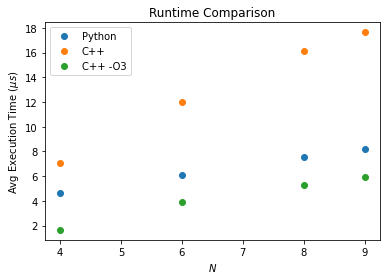

In [92]:
import matplotlib.pyplot as plt

Len = [4,6,8,9]

# Plotting both lists on the same plot
plt.plot(Len,avg_ts_py,'o', label='Python')
plt.plot(Len,avg_ts_cpp,'o', label='C++')
plt.plot(Len,avg_ts_cpp_o3,'o', label='C++ -O3')

# Adding labels and legend
plt.xlabel('$N$')
plt.ylabel('Avg Execution Time ($\mu s$)')
plt.title('Runtime Comparison')
plt.legend()

# Display the plot
plt.show()


### Discussion

Unfortunatly, I have not had time to analytically determine the time complexity of my **C++** code. It is mentioned here, as I can not guarantee that my **C++** implementation is a direct transaltion of the **Python** code. That is to say, it may be that my **python** code is a more efficient realisation of the fundamental algorithm in comparison to the **C++** version. In reality the differences in efficiency are probably not so stark, or more likely, non-existent/negligible. It is still an important point to mention. 

Ignoring that caveat, we see that the **python** function has a consitently shorter average runtime in comparison to the compiled **C++** function without an Optimisation flag argument. The **C++** code also experiences a much steeper increase in execution time.

When we compile the **C++** code with the '-O3' optimiser flag, the runtime decreases considerably; able to run faster than both the unoptimised **C++** code and the **python** code. Of course, this is as expected, as 3rd level optimisation is a trade off. The compilation time of the code is slower, but it should result in a faster executable program. We can see its effects here, but only to a limited degree. My **python** code had a time complexity of $O(n^3)$ which becomes more apparent as the length of the preference tables increases. It would be useful to see how the optimised **C++** fairs for $N \geq 10$.